In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from mpl_toolkits.basemap import Basemap

import networkx as nx
from networkx.algorithms import community


import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

In [3]:
earthquake_data = pd.read_csv("demo_data/earthquakes.csv")
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [4]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [5]:
earthquake_data = earthquake_data[["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]]


In [6]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

In [7]:
earthquake_data

,Date,Time,Latitude,Longitude,Magnitude,Depth,DateTime
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00,1965-01-09 13:32:50
...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30,2016-12-28 08:22:12
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80,2016-12-28 09:13:47
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00,2016-12-28 12:38:51
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00,2016-12-29 22:30:19


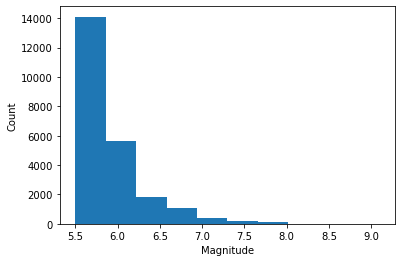

In [8]:
plt.hist(earthquake_data.Magnitude)
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

In [9]:
earthquake_data[earthquake_data.Magnitude == earthquake_data.Magnitude.max()]

,Date,Time,Latitude,Longitude,Magnitude,Depth,DateTime
17083,12/26/2004,00:58:53,3.295,95.982,9.1,30.0,2004-12-26 00:58:53
20501,03/11/2011,05:46:24,38.297,142.373,9.1,29.0,2011-03-11 05:46:24


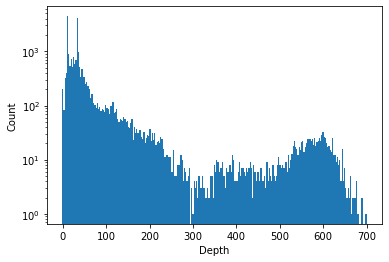

In [10]:
plt.hist(earthquake_data.Depth, bins = "fd")
plt.xlabel("Depth")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

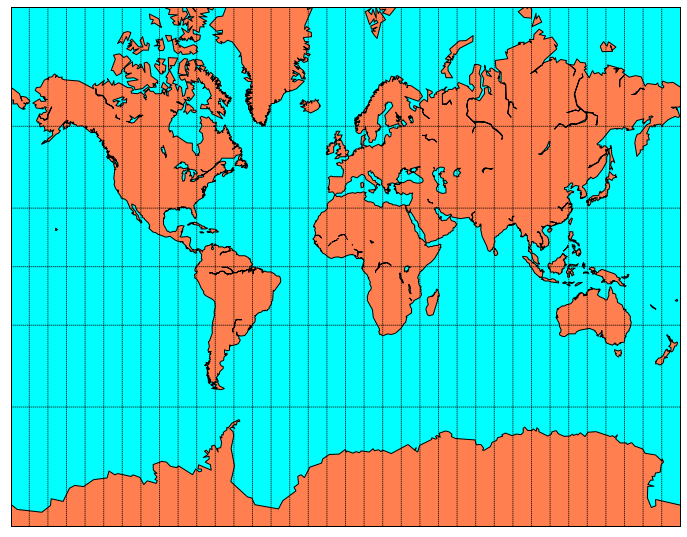

In [11]:
plt.figure(figsize = (12, 15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 10))
m.drawmapboundary(fill_color = "aqua")
plt.show()


In [12]:
earthquake_coordinates = m(earthquake_data.Longitude.to_list(), earthquake_data.Latitude.to_list())

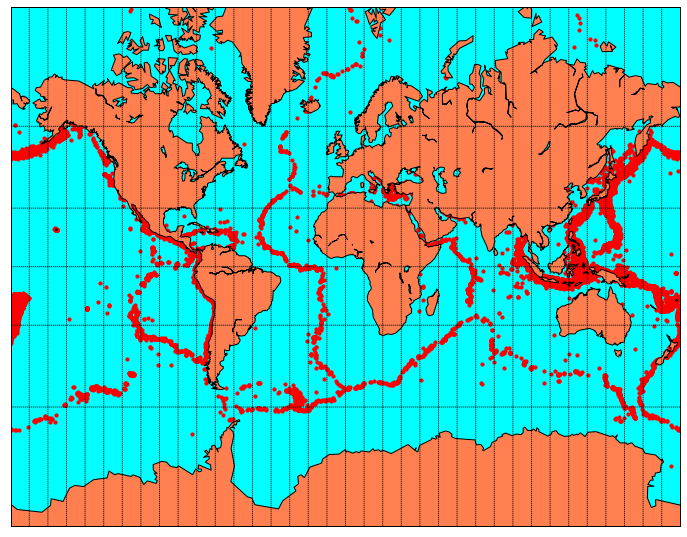

In [13]:
plt.figure(figsize = (12, 15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 10))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(earthquake_coordinates[0], earthquake_coordinates[1], c = "r", s = 10)

plt.show()

In [14]:
volcanos_data = pd.read_csv("demo_data/volcanos.csv")
volcanos_data

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [15]:
volcano_coordinates = m(volcanos_data.Longitude.to_list(), volcanos_data.Latitude.to_list())

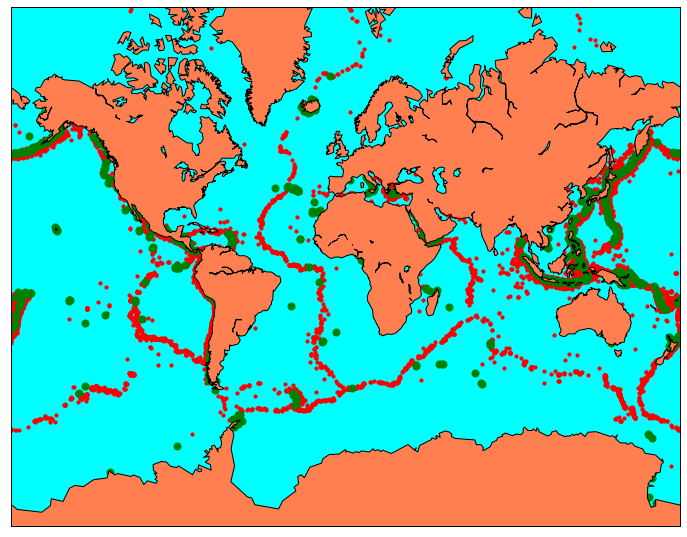

In [16]:
plt.figure(figsize = (12, 15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
# m.drawparallels(np.arange(-90, 91, 30))
# m.drawmeridians(np.arange(-180, 181, 10))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(earthquake_coordinates[0], earthquake_coordinates[1], c = "r", s = 10)
plt.scatter(volcano_coordinates[0], volcano_coordinates[1], c = "g", s = 50)


plt.show()

In [17]:
ufos = pd.read_csv("demo_data/ufo_sightings_scrubbed.csv", low_memory=False)
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]
ufos.columns = ["datetime", "country", "state", "latitude", "longitude"]
ufos = ufos[ufos.country == "us"]


In [18]:
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,tn,36.1658333,-86.784444
80328,9/9/2013 22:00,us,id,43.6136111,-116.202500
80329,9/9/2013 22:00,us,ca,38.2972222,-122.284444
80330,9/9/2013 22:20,us,va,38.9011111,-77.265556


In [19]:
# Replace state abbreviation with state name
state_names = pd.read_csv("demo_data/states.csv")
state_names.abbreviation = state_names.abbreviation.str.lower()
state_names_dict = {state.abbreviation: state["name"] for index, state in state_names.iterrows()}
ufos.state.replace(state_names_dict, inplace = True)

In [20]:
num_sightings_by_state = ufos.groupby("state").size()

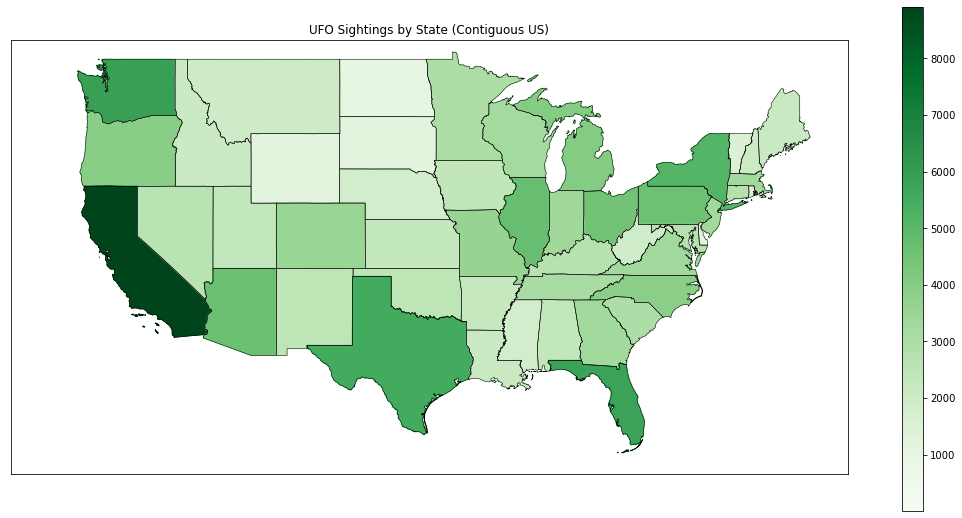

In [21]:
fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("demo_data\st99_d00", "states", drawbounds = True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()

for shape_dict in m.states_info:
    state_name = shape_dict["NAME"]
    # Skip DC and Puerto Rico
    if state_name not in ["District of Columbia", "Puerto Rico"]:
        sightings = num_sightings_by_state[num_sightings_by_state.index == state_name][0]
        colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
    state_names.append(state_name)

ax = plt.gca()
for nshape, seg in enumerate(m.states):
    # Skip DC and Puerto Rico
    if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
        color = rgb2hex(colors[state_names[nshape]])
        poly = Polygon(seg, facecolor = color, edgecolor = color)
        ax.add_patch(poly)

plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap,
  norm = matplotlib.colors.Normalize(vmin, vmax))
plt.show()

In [22]:
g = nx.Graph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

In [23]:
g.nodes

NodeView(('a', 'b', 'c', 'd'))

In [24]:
g.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

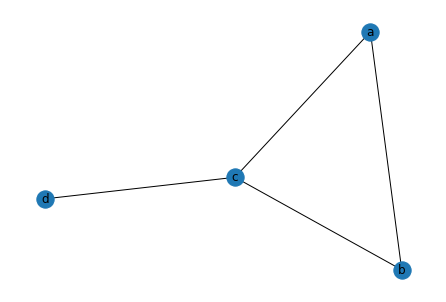

In [25]:
nx.draw(g, with_labels = True)
plt.show()

In [26]:
nx.shortest_path(g, "a", "d")

['a', 'c', 'd']

In [27]:
nx.shortest_path_length(g, "a", "d")

2

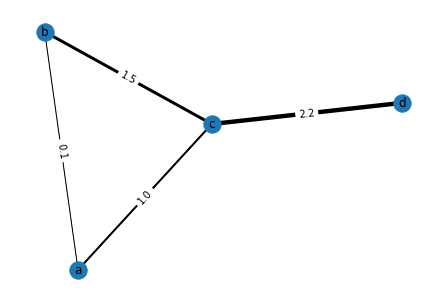

In [28]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()

In [29]:
pos

{'a': array([-0.48704246, -0.92008199]),
 'b': array([-0.64038083,  0.67058459]),
 'c': array([0.1274233 , 0.05413487]),
 'd': array([1.        , 0.19536253])}

In [30]:
nx.shortest_path(g, "b", "d", weight="weight")

['b', 'a', 'c', 'd']

In [31]:
nx.shortest_path_length(g, "b", "d", weight="weight")

3.3000000000000003

In [32]:
g = nx.DiGraph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

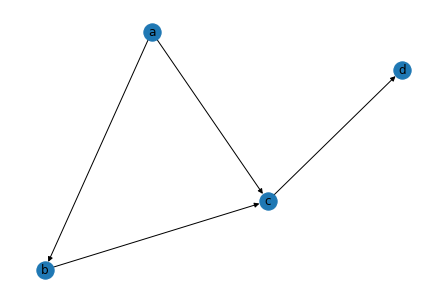

In [33]:
nx.draw(g, with_labels = True)
plt.show()

In [34]:
# Show shortest path - if there are no path between two edges it will throw an error.
nx.shortest_path(g, "b", "d")

['b', 'c', 'd']

In [35]:
nx.shortest_path_length(g, "b", "d")

2

In [36]:
facebook_graph = nx.read_edgelist("demo_data/facebook_combined.txt")

In [37]:
facebook_graph

In [38]:
len(facebook_graph.nodes), len(facebook_graph.edges)

(4039, 88234)

In [39]:
karate_graph = nx.karate_club_graph()

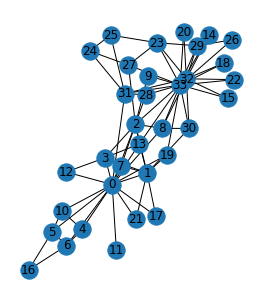

In [40]:
nx.draw(karate_graph, with_labels=True)
plt.gca().set_aspect("equal")
plt.show()

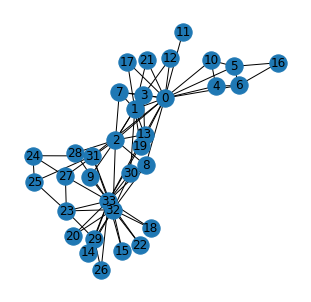

In [41]:
nx.draw_spring(karate_graph, with_labels=True)
plt.gca().set_aspect("equal")
plt.show()

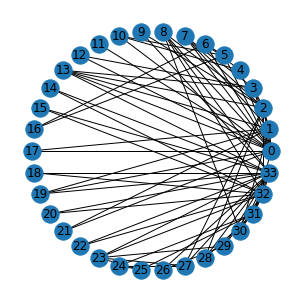

In [42]:
nx.draw_circular(karate_graph, with_labels=True)
plt.gca().set_aspect("equal")
plt.show()

In [43]:
# Show all shortest path from member 17 to all other karate club members.
[nx.shortest_path(karate_graph, 17, other) for other in list(karate_graph.nodes)]

[[17, 0],
 [17, 1],
 [17, 0, 2],
 [17, 0, 3],
 [17, 0, 4],
 [17, 0, 5],
 [17, 0, 6],
 [17, 0, 7],
 [17, 0, 8],
 [17, 0, 2, 9],
 [17, 0, 10],
 [17, 0, 11],
 [17, 0, 12],
 [17, 0, 13],
 [17, 0, 2, 32, 14],
 [17, 0, 2, 32, 15],
 [17, 0, 5, 16],
 [17],
 [17, 0, 2, 32, 18],
 [17, 0, 19],
 [17, 0, 2, 32, 20],
 [17, 0, 21],
 [17, 0, 2, 32, 22],
 [17, 0, 31, 25, 23],
 [17, 0, 31, 24],
 [17, 0, 31, 25],
 [17, 0, 8, 33, 26],
 [17, 0, 2, 27],
 [17, 0, 2, 28],
 [17, 0, 2, 32, 29],
 [17, 1, 30],
 [17, 0, 31],
 [17, 0, 2, 32],
 [17, 0, 8, 33]]

In [44]:
list(karate_graph.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [45]:
centrality = nx.betweenness_centrality(karate_graph)
centrality

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

level 1 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
level 2 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
level 3 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
level 4 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
level 5 ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
level 6 ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
level 7 ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11

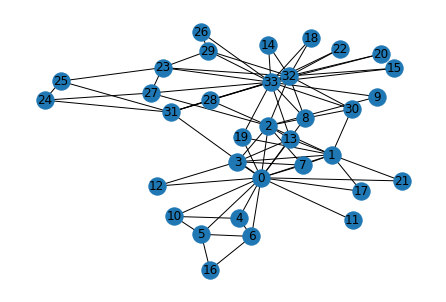

In [46]:
nx.draw(karate_graph, with_labels = True)
communities_generator = community.girvan_newman(karate_graph)
for i in range(1, 10):
    communities = next(communities_generator)
    print("level " + str(i), communities)